# Projeto 3

### Importando bibliotecas

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import *

### Parâmetros

In [149]:
massa_bola=2 # kg
k_mola=2981 # N/m
g=9.8 # m/s^2
Cd=0.47 # Coeficiente de arrasto
p=1.2 # kg/m^3
A=pi*0.1**2 # m^2
c=7.0 # N.s/m

### Condições iniciais

In [150]:
# Condições iniciais

y_0 = 1.025 # posicao inicial no eixo y
Vy_0 = -1 # velocidade inicial na direção do eixo y
condicoes_iniciais = [y_0, Vy_0] 

### Lista de tempo

In [151]:
tempo_inicial = 0
tempo_final = 8
dt = 1e-2

tempo = np.arange(tempo_inicial, tempo_final, dt)

### Define a função modelo

In [152]:
def modelo(X,t):
    
    y = X[0] # Posição y
    vy = X[1] # Velocidade y

    D = 1/2 * p * Cd * A * (vy) * abs(vy)
    Fel = k_mola * (-y) # Força elástica
    P = massa_bola * g # Peso
    F_amort = c * (-vy) # Força amortecimento

    if y>0:
        Fel=0
        F_amort = 0
    
    elif y<0 and vy>0:
        F_amort = 0
        D = 0

    
    # Equações diferenciais
    dydt = vy
    dvydt = (-P + Fel - D + F_amort) / massa_bola

    return [dydt,dvydt]


## ODEINT + Plot

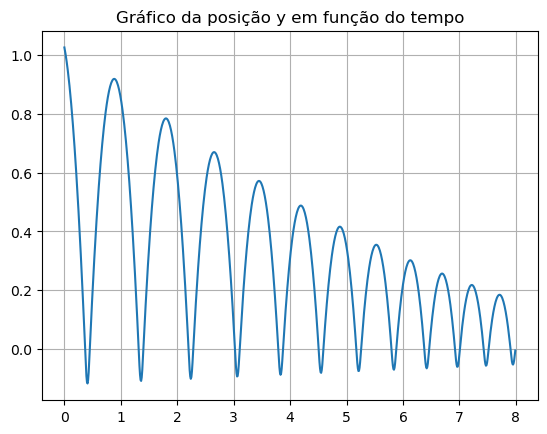

In [153]:
solucao_odeint = odeint(modelo, condicoes_iniciais, tempo)
lista_y = solucao_odeint[:,0]
lista_vy = solucao_odeint[:,1]


plt.plot(tempo, lista_y, label='y(t)')
plt.title('Gráfico da posição y em função do tempo')
plt.grid()
plt.show()

## Validação

### Acessando os dados do arquivo .txt

In [154]:
dados = "dados.txt"

# Passo 1: Abra o arquivo em modo de leitura
arquivo = open(dados, "r")

# Passo 2: Leia o conteúdo do arquivo
conteudo = arquivo.read()

# Passo 3: Feche o arquivo
arquivo.close()

# Passo 4: Divida o conteúdo em linhas
linhas = conteudo.splitlines()

# Passo 5: Armazene as linhas em uma lista
solucao = list(linhas)

# Lista
lista_altura = []
lista_tempo = []

# Adiciona +1.344 ao tempo devido ao momento de lançamento da bola no vídeo
for i in range(len(solucao)):
    lista_altura.append(float(solucao[i].split(',')[0]))
    lista_tempo.append(float(solucao[i].split(',')[1]) - 1.344 )

print(lista_tempo)

[0.0, 0.010000000000000009, 0.020000000000000018, 0.030000000000000027, 0.038999999999999924, 0.04899999999999993, 0.05899999999999994, 0.06899999999999995, 0.07899999999999996, 0.08899999999999997, 0.09899999999999998, 0.10899999999999999, 0.11799999999999988, 0.1279999999999999, 0.1379999999999999, 0.1479999999999999, 0.15799999999999992, 0.16799999999999993, 0.17799999999999994, 0.18799999999999994, 0.19699999999999984, 0.20699999999999985, 0.21699999999999986, 0.22699999999999987, 0.23699999999999988, 0.2469999999999999, 0.2569999999999999, 0.2669999999999999, 0.276, 0.2859999999999998, 0.2959999999999998, 0.3059999999999998, 0.31599999999999984, 0.32599999999999985, 0.33599999999999985, 0.34599999999999986, 0.355, 0.365, 0.375, 0.385, 0.395, 0.405, 0.4149999999999998, 0.4249999999999998, 0.43499999999999983, 0.44399999999999995, 0.45399999999999996, 0.46399999999999997, 0.474, 0.484, 0.494, 0.504, 0.514, 0.5229999999999999, 0.5329999999999999, 0.5429999999999999, 0.552999999999999

In [155]:
# lista_altura = []
# lista_tempo = []

# y2 = 0
# z = 0

# for x in range(len(lista_y)):
#     if tempo[x] > 1:
#         y2 += 0.0000108
#         z += 0.000072
    
#     y2 = 0.0000212
#     z += 0.000122
    
#     y3 = float(lista_y[x])
#     y_final = y2 + y3
    
#     lista_altura.append(y_final)
#     lista_tempo.append(float(tempo[x] - z) + 1.344)

# # Abrir o arquivo para escrita
# with open('dados.txt', 'w') as arquivo:
#     # Escrever os dados no arquivo, convertendo notação científica para decimal se necessário
#     for i in range(len(lista_altura)):
#         altura_cientifica = "{:.3e}".format(lista_altura[i])
#         if 'e-01' in altura_cientifica or 'e+00' in altura_cientifica:
#             altura_decimal = "{:.3f}".format(float(altura_cientifica))
#         else:
#             altura_decimal = altura_cientifica
        
#         tempo_cientifico = "{:.3e}".format(lista_tempo[i])
#         if 'e-01' in tempo_cientifico or 'e+00' in tempo_cientifico:
#             tempo_decimal = "{:.3f}".format(float(tempo_cientifico))
#         else:
#             tempo_decimal = tempo_cientifico
        
#         arquivo.write(f"{altura_decimal},{tempo_decimal}\n")



### Plotando os dados

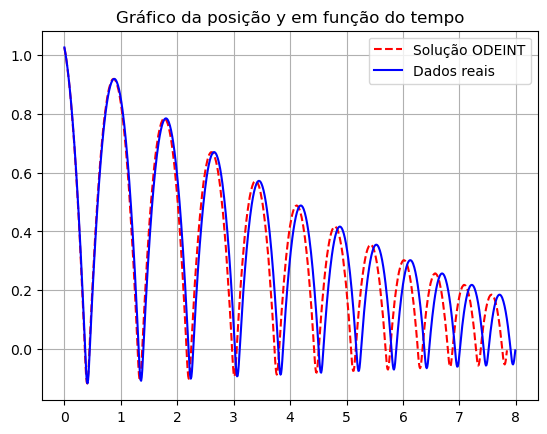

In [156]:
plt.plot(lista_tempo, lista_altura,'r--',label='Solução ODEINT' )
plt.plot(tempo, lista_y, label='Dados reais', color='blue')
plt.title('Gráfico da posição y em função do tempo')
plt.legend()
plt.grid()
plt.show()